# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [15]:
import pandas as pd

In [16]:
data = pd.read_csv('train.csv')

In [17]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 1186 to 7270
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5329 non-null   int64 
 1   keyword   5285 non-null   object
 2   location  3569 non-null   object
 3   text      5329 non-null   object
 4   target    5329 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 249.8+ KB


In [20]:
test = test[test.columns].fillna("")

In [21]:
train = train[train.columns].fillna("")

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 1186 to 7270
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5329 non-null   int64 
 1   keyword   5329 non-null   object
 2   location  5329 non-null   object
 3   text      5329 non-null   object
 4   target    5329 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 249.8+ KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 2644 to 6753
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2284 non-null   int64 
 1   keyword   2284 non-null   object
 2   location  2284 non-null   object
 3   text      2284 non-null   object
 4   target    2284 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 107.1+ KB


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [24]:
train.target.value_counts() # распределение классов приблизительно равное, с небольшим преобладание отрицательного класса

0    3024
1    2305
Name: target, dtype: int64

In [25]:
a = train.keyword.value_counts().head(11)
a = a.keys().delete(0) #удаляем ключевое слово ''
data = train[train.keyword.isin(a)]

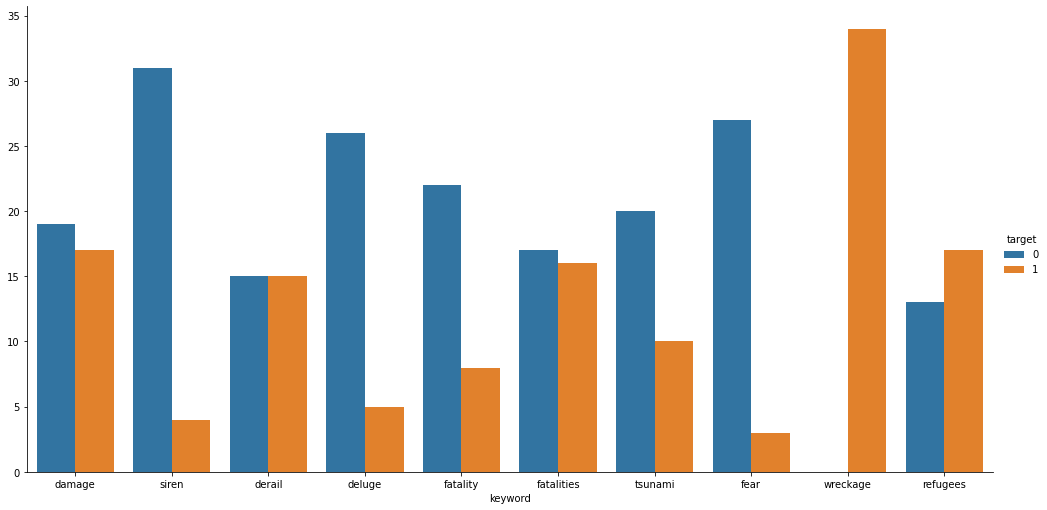

In [26]:
train[train['keyword'] =='damage'].value_counts('target')
ll = [1] * len(data.target)
import seaborn as sns
sns.catplot(x='keyword', y=ll, estimator=sum, hue='target', kind="bar", data=data, height=7, aspect=2)

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [27]:
train["text"] = train["keyword"]+' '+train["location"]+' '+train["text"]
train = train.drop(['id','keyword','location'], axis=1)
test["text"] = test["keyword"]+' '+test["location"]+' '+test["text"]
test = test.drop(['id','keyword','location'], axis=1)

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(train.text)
bow
#Видно, что матрица получилось достаточно больших размеров

<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [29]:
import re
from string import punctuation

In [30]:
def func1(vec):
    numb = []
    punc = []
    has = []
    for i in vec.vocabulary_.keys():
        if re.search('\d+', i):
            numb.append(i)
        if re.search('[^\w\s]|_', i):
            punc.append(i)
        if re.search('(@|#).*', i):
            has.append(i)
    return numb, punc, has

In [31]:
a,b,c = func1(vec)
print(len(a))
print(len(b))
print(len(c))

3812
315
0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [32]:
from nltk.tokenize import TweetTokenizer
tw = TweetTokenizer()
vec1 = CountVectorizer(ngram_range=(1, 1), tokenizer=tw.tokenize)
bow1 = vec1.fit_transform(train.text)
bow1

<5329x19670 sparse matrix of type '<class 'numpy.int64'>'
	with 94563 stored elements in Compressed Sparse Row format>

In [33]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
a,b,c = func1(vec1)
print(len(a))
print(len(b))
print(len(c))

3939
7354
3155


 Можно заметить, что при использовании TweetTokenizer мы получили более 3000 хэштегов и упоминаний, в то время как стандартный CountVectorizer не определил ни одного. Также в разы увеличилось количество токенов, содержащих знаки препинания(стандартный токенизатор отбрасывал все знаки перпинания, кроме "_")

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [35]:
import nltk
nltk.download("stopwords")
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def custom_tokenizer(string):
    string = string.lower()
    tw = TweetTokenizer()
    lst = tw.tokenize(string)
    i = 0
    while i < len(lst):
        if lst[i] in nltk.corpus.stopwords.words('english'):
            lst.remove(lst[i])
            i -= 1
        elif re.search('[^a-z]+', lst[i]):
            if not re.search('([^\w\s]|_)*[\(\)]+([^\w\s]|_)*', lst[i]) and not re.search('#[a-z]+', lst[i]):
                lst.remove(lst[i])
                i -= 1
        i += 1
    stemmer = SnowballStemmer('english')
    lst_stemmed = [stemmer.stem(w) for w in lst]
    return lst_stemmed


In [37]:
a = train.head(10)
for text in a.items():
    for i in text[1]:
        if type(i) == int:
            break
        print(custom_tokenizer(i))

['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['burn', 'except', 'idk', 'realli', 'burn']
['destroy', '(', 'ask', ')', 'destroy', 'hous']
['wound', 'maracay', 'nirgua', 'venezuela', 'polic', 'offic', 'wound', 'suspect

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [38]:
vec2 = CountVectorizer(tokenizer=custom_tokenizer)
train_tok = vec2.fit_transform(train.text)
test_tok = vec2.transform(test.text)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_tok, train.target)

LogisticRegression()

In [40]:
from sklearn.metrics import f1_score
f1_score(test.target, lr.predict(test_tok))

0.7540279269602578

## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tf = TfidfVectorizer(ngram_range=(1, 1), tokenizer=custom_tokenizer)
train_tok = vec_tf.fit_transform(train.text)
test_tok = vec_tf.transform(test.text)
lr = LogisticRegression()
lr.fit(train_tok, train.target)
f1_score(test.target, lr.predict(test_tok))

0.7433333333333335

In [42]:
vec_tf = TfidfVectorizer(ngram_range=(1, 1), tokenizer=custom_tokenizer, max_df=0.9)
train_tok = vec_tf.fit_transform(train.text)
test_tok = vec_tf.transform(test.text)
lr = LogisticRegression()
lr.fit(train_tok, train.target)
f1_score(test.target, lr.predict(test_tok))

0.7433333333333335

In [49]:
vec_tf = TfidfVectorizer(ngram_range=(1, 1), tokenizer=custom_tokenizer, max_df=0.9, min_df=0.0005)
train_tok = vec_tf.fit_transform(train.text)
test_tok = vec_tf.transform(test.text)
lr = LogisticRegression()
lr.fit(train_tok, train.target)
f1_score(test.target, lr.predict(test_tok))

0.7444690265486725

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [50]:
from sklearn.feature_extraction.text import HashingVectorizer
vec_hash = HashingVectorizer(ngram_range=(1, 1), tokenizer=custom_tokenizer, n_features=5000)
train_tok = vec_hash.fit_transform(train.text)
test_tok = vec_hash.transform(test.text)
lr = LogisticRegression()
lr.fit(train_tok, train.target)
f1_score(test.target, lr.predict(test_tok))

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7191513121161363

Лучший результат показал CountVectorizer


## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [51]:
vec2 = CountVectorizer(ngram_range=(1, 1), tokenizer=custom_tokenizer)
train_tok = vec2.fit_transform(train.text)
test_tok = vec2.transform(test.text)
lr = LogisticRegression()
lr.fit(train_tok, train.target)
f1_score(test.target, lr.predict(test_tok))

0.7540279269602578

изменения параметра ngram_range в CountVectorizer, а также границ df а TfDfVectorizer, не привели к увелечению f1_score относительно изначального результата